In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from scipy.optimize import curve_fit
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler,LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns

In [28]:
data = pd.read_csv('house_features.csv')

data = data[data.apply(lambda row: len(row) == 8, axis=1)]

data = data[data['Address'].notnull()]

data['Area'] = pd.to_numeric(data['Area'], errors='coerce')

data = data[data['Area'] < 1000]

data.to_csv('cleaned_dataset.csv', index=False)

df = pd.read_csv('cleaned_dataset.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95.0,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [29]:
enc = OrdinalEncoder()
numeric_address = enc.fit_transform(df[['Address']])
df['numeric_address'] = numeric_address
df.drop('Address', axis=1, inplace=True)
df.head()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD),numeric_address
0,63.0,1,True,True,True,1.850000e+09,61666.67,156.0
1,60.0,1,True,True,True,1.850000e+09,61666.67,156.0
2,79.0,2,True,True,True,5.500000e+08,18333.33,117.0
3,95.0,2,True,True,True,9.025000e+08,30083.33,152.0
4,123.0,2,True,True,True,7.000000e+09,233333.33,150.0


In [49]:
X = df[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'numeric_address']]
scaler = preprocessing.StandardScaler().fit(X)
Z = scaler.transform(X.astype(float))
Z

array([[-0.63153331, -1.42237999,  0.42413507,  0.30464673,  0.51940625,
         1.01365174],
       [-0.67467339, -1.42237999,  0.42413507,  0.30464673,  0.51940625,
         1.01365174],
       [-0.40145286, -0.10677383,  0.42413507,  0.30464673,  0.51940625,
         0.23852391],
       ...,
       [-0.45897297, -0.10677383, -2.35773946, -3.28249052, -1.92527527,
         0.19877377],
       [-0.02757214, -0.10677383,  0.42413507,  0.30464673,  0.51940625,
        -1.31173174],
       [-0.35831278, -0.10677383, -2.35773946,  0.30464673,  0.51940625,
         0.19877377]])

In [31]:
Y = df['Price(USD)']
Y

0        61666.67
1        61666.67
2        18333.33
3        30083.33
4       233333.33
          ...    
3445    116666.67
3446    226666.67
3447     12166.67
3448    186666.67
3449     12000.00
Name: Price(USD), Length: 3450, dtype: float64

In [42]:
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X.astype(float))
X_scaled[0: 5]

array([[-0.63153331, -1.42237999,  0.42413507,  0.30464673,  0.51940625,
         1.01365174],
       [-0.67467339, -1.42237999,  0.42413507,  0.30464673,  0.51940625,
         1.01365174],
       [-0.40145286, -0.10677383,  0.42413507,  0.30464673,  0.51940625,
         0.23852391],
       [-0.17137242, -0.10677383,  0.42413507,  0.30464673,  0.51940625,
         0.93415145],
       [ 0.23126836, -0.10677383,  0.42413507,  0.30464673,  0.51940625,
         0.89440131]])

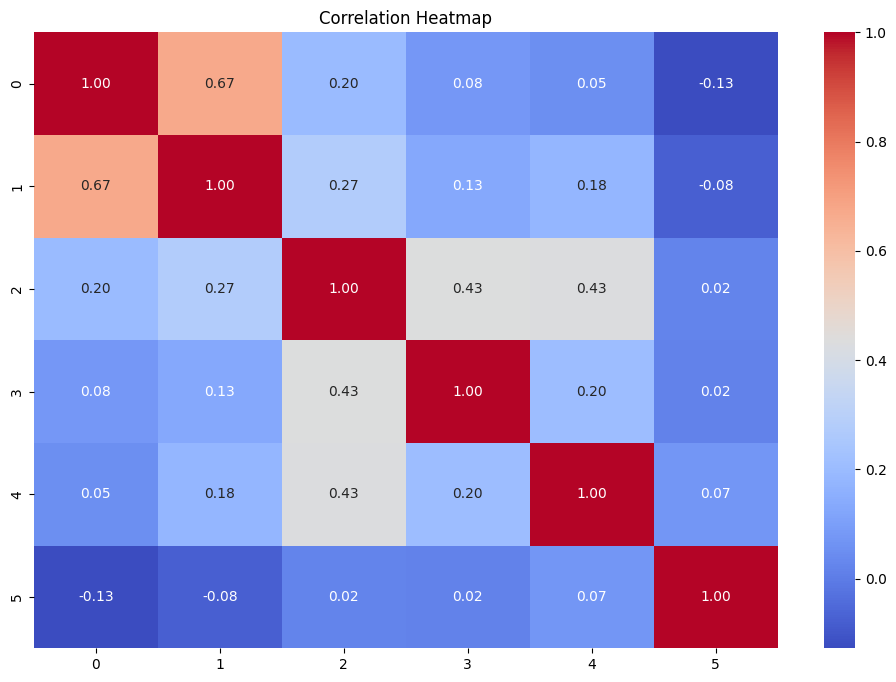

In [46]:
X_scaled_df = pd.DataFrame(X_scaled)
plt.figure(figsize=(12, 8))
correlation_matrix = X_scaled_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

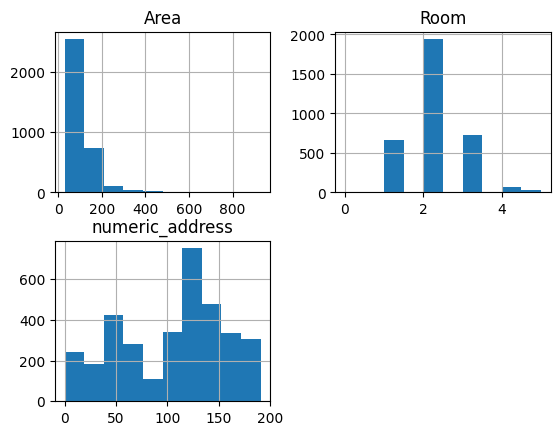

In [50]:
X.hist()
plt.show()

In [32]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=4)
print('Train set: ', train_x.shape, train_y.shape)
print('Test set: ', test_x.shape, test_y.shape)

Train set:  (2760, 6) (2760,)
Test set:  (690, 6) (690,)


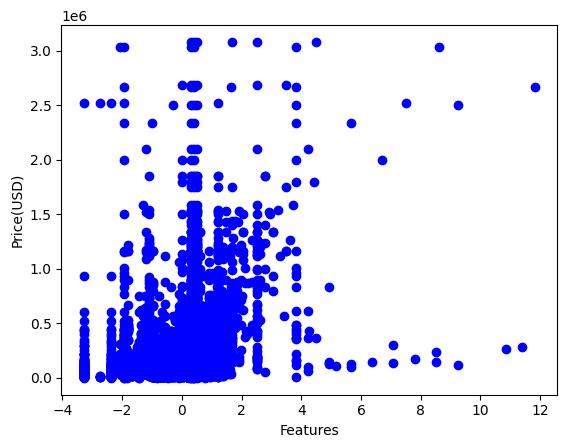

In [33]:
plt.plot(train_x, train_y, 'bo')
plt.xlabel('Features')
plt.ylabel('Price(USD)')
plt.show()
df.to_csv('cleaned_dataset_2.csv', index=False)

In [34]:
model=GradientBoostingRegressor(loss='squared_error',n_estimators=2760,max_depth=128,min_samples_split=2,min_samples_leaf=2)

In [35]:

model.fit(train_x,train_y)

predict_trainYn = model.predict(train_x)
predict_testYn=model.predict(test_x)

r_train=r2_score(train_y,predict_trainYn)
r_test=r2_score(test_y,predict_testYn)
print(r_train)
print(r_test) 

0.9905907532175524
0.7328577976985137


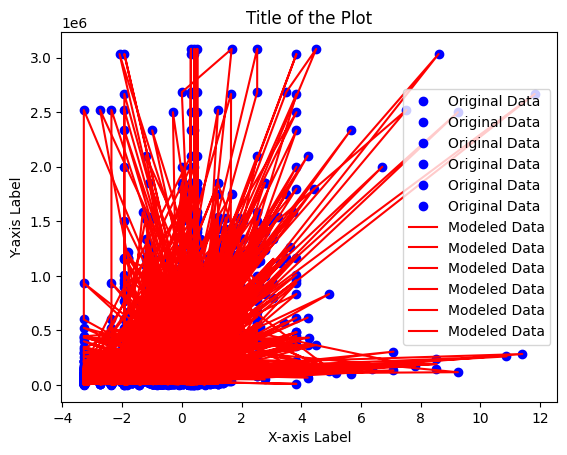

In [41]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Assuming you have already trained your DecisionTreeRegressor model and stored it in a variable named 'model'

# Generate predictions using the model
  # Assuming train_x is your input data for the model

# Plot the original data
plt.plot(train_x, train_y, 'bo', label='Original Data')

# Plot the modeled data (predictions)
plt.plot(train_x, predict_trainYn, 'r', label='Modeled Data')

# Add labels and legend
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Title of the Plot')
plt.legend()

# Show the plot
plt.show()